In this code, we visualize the Phase Space data from TOPAS. 
The package of topas2numpy is used to convert the phase space data into numpy format.
The visualization use matplotlib, and also plotly as interactive plot.

In [ ]:
%pip install topas2numpy
%pip install pandas
%pip install matplotlib
%pip install plotly==6.0.0rc0
%pip install nbformat

In [3]:
import os
from topas2numpy import read_ntuple  
import matplotlib.pyplot as plt
import pandas as pd

The directory of for this project is accessed from os.getcwd() as the Base Directory (where the code and data is stored in the computer).
The Base Directory is structured as follow:
1. Data
    - input: for the phase space data
    - output: for saving the processed data as image or excel file
    - parameter: for the topas code
2. src (for the code)

Each phase space data must be named within this nomenclature:
beam type_beam energy_material_position_before or after of the observed component_the name of the component_other parameter_size of the phase space in cm

All of the phase space is traced within the input directory, and categorized as phase space based on the nomenclature using the `for` loop in the directory.
The nomenclature is recognized with:
        nomen = item.split('_')
        beamtype = nomen [0]          
        beam_energy = nomen[1]       
        material = nomen[2]          
        position = nomen[3]     
        beforeafter = nomen [4]     
        component = nomen[5]         
        other = nomen [6]
        size = nomen[7]            
Each part of nomenclature is list and saved in the variable.

The phase space is converted as numpy by using the read_ntuple from topas2numpy.
Each converted phase space is stored as data frame, and stored in the categorized_phsp_data dictionary.

In [4]:
#directory
basedirectory = os.getcwd()
phspdirectory = os.path.join(basedirectory, "..","data","input")
outputdirectory = os.path.join(basedirectory, "..","data","output")

# Create the "output" folder if it doesn't exist
os.makedirs(outputdirectory, exist_ok=True)

#dictionary
phsp_category = {}
phsp_dataframe = {}
phsp_label = {}
categorized_phsp_data = {}

#looping the file inside the directory, 
for item in os.listdir(phspdirectory): 
#Returns a list of the names of the entries in a directory
    if item.endswith(".phsp"):
        files = os.path.join (phspdirectory, item)
        data = read_ntuple(files)

        nomen = item.split('_')
        beamtype = nomen [0]          
        beam_energy = nomen[1]       
        material = nomen[2]          
        position = nomen[3]     
        beforeafter = nomen [4]     
        component = nomen[5]         
        other = nomen [6]
        size = nomen[7]              
        key = f"{beamtype}_{beam_energy}_{material}_{position}_{beforeafter}_{component}_{size}"

        categorized_phsp_data[key] = {}
        categorized_phsp_data[key][item] = data
     
        df = pd.DataFrame (data) 
        phsp_dataframe [item] = df

        print(f"File: {item}")
        print("Field Names (dtype):", data.dtype.names)
        print("-" * 40)  # Just to separate the output for each file

File: Proton_140MeV_Udara_(-08-5688CM)_After_IronCollimator_Default_60x60.phsp
Field Names (dtype): ('Position X [cm]', 'Position Y [cm]', 'Position Z [cm]', 'Direction Cosine X', 'Direction Cosine Y', 'Energy [MeV]', 'Weight', 'Particle Type (in PDG Format)', 'Flag to tell if Third Direction Cosine is Negative (1 means true)', 'Flag to tell if this is the First Scored Particle from this History (1 means true)')
----------------------------------------
File: Proton_140MeV_Udara_(-08-5688CM)_After_NickelCollimator_Default_60x60.phsp
Field Names (dtype): ('Position X [cm]', 'Position Y [cm]', 'Position Z [cm]', 'Direction Cosine X', 'Direction Cosine Y', 'Energy [MeV]', 'Weight', 'Particle Type (in PDG Format)', 'Flag to tell if Third Direction Cosine is Negative (1 means true)', 'Flag to tell if this is the First Scored Particle from this History (1 means true)')
----------------------------------------
File: Proton_140MeV_Udara_(-08-5688CM)_After_CopperCollimator_Default_60x60.phsp
Fie

The phase space is plotted using matplotlib.
The `if` is used to filter the desired data for the plotting, based on the nomenclature.
    if other == 'Default' and 'Energy [MeV]' in df.columns:
        plt.hist(df['Energy [MeV]'], bins=1000, alpha=0.5, label=component)

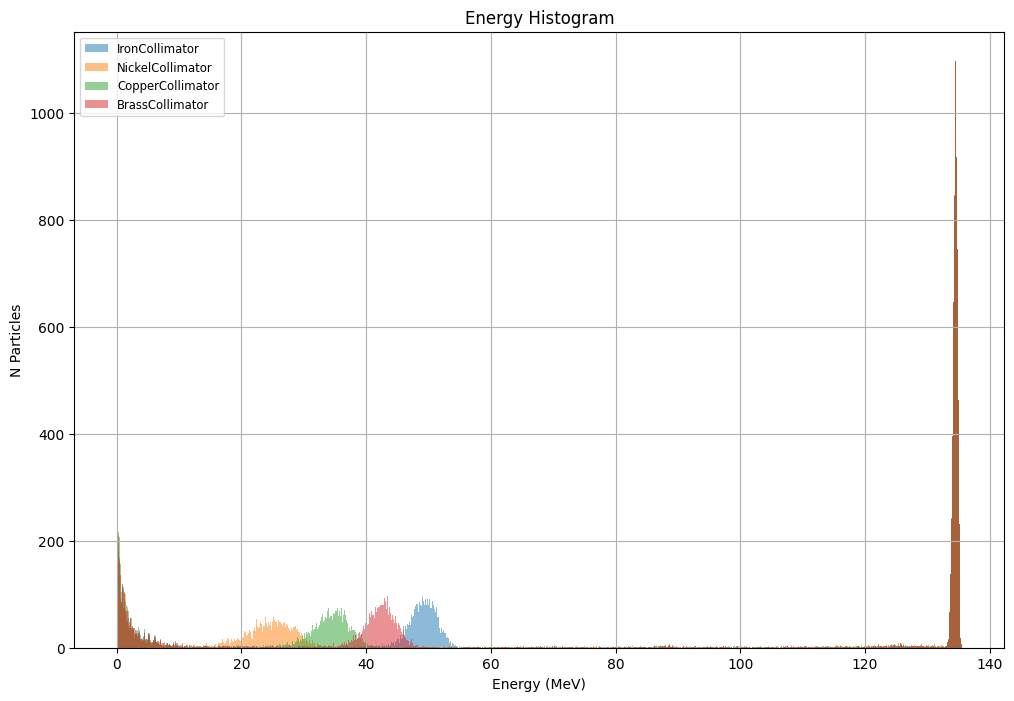

In [10]:
# Plot energy distributions for each file
plt.figure(figsize=(12, 8))

for item, df in phsp_dataframe.items():
    nomen = item.split('_')
    beamtype = nomen [0]          
    beam_energy = nomen[1]       
    material = nomen[2]          
    position = nomen[3]     
    beforeafter = nomen [4]     
    component = nomen[5]         
    other = nomen [6]
    size = nomen[7]     
    key = f"{beamtype}_{beam_energy}_{material}_{position}_{beforeafter}_{component}_{size}"
    if component in ['BrassCollimator', 'IronCollimator', 'NickelCollimator', 'CopperCollimator'] and other == 'Default' and 'Energy [MeV]' in df.columns:
        plt.hist(df['Energy [MeV]'], bins=1000, alpha=0.5, label=component)


# Customize the plot
plt.title("Energy Histogram")
plt.xlabel("Energy (MeV)")
plt.ylabel("N Particles")
plt.legend(loc='upper left', fontsize='small')
plt.grid(True)

# Save the combined graph
output_path = os.path.join(outputdirectory, "energy histogram2.png")
plt.savefig(output_path, dpi=200)
plt.show()

Plotly is used to make the graphic interactive.
The graphic plotted can be filtered based on the nomenclature part.
The histogram is plotted by:  
        fig = px.histogram(df['Energy [MeV]'], nbins=1000, labels={'value': 'Energy (MeV)'}, 
                   title=f"{component}")

In [6]:
import plotly.express as px

for item, df in phsp_dataframe.items():
    nomen = item.split('_')
    beamtype = nomen [0]          
    beam_energy = nomen[1]       
    material = nomen[2]          
    position = nomen[3]     
    beforeafter = nomen [4]     
    component = nomen[5]         
    other = nomen [6]
    size = nomen[7]     
    key = f"{beamtype}_{beam_energy}_{material}_{position}_{beforeafter}_{component}_{size}"
    if 'Energy [MeV]' in df.columns:
        fig = px.histogram(df['Energy [MeV]'], nbins=1000, labels={'value': 'Energy (MeV)'}, 
                   title=f"{component}")
        fig.show()

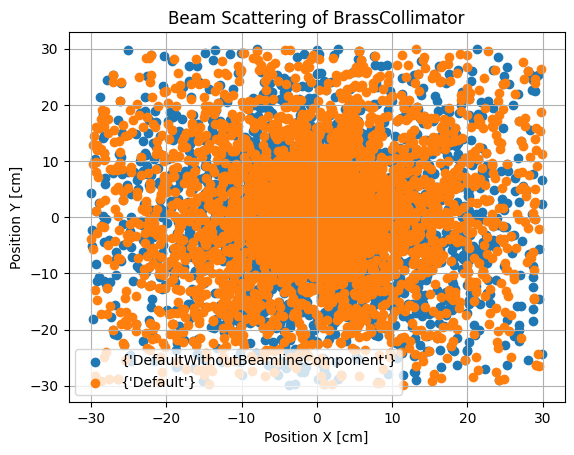

In [7]:
for item, df in phsp_dataframe.items():
    nomen = item.split('_')
    beamtype = nomen [0]          
    beam_energy = nomen[1]       
    material = nomen[2]          
    position = nomen[3]     
    beforeafter = nomen [4]     
    component = nomen[5]         
    other = nomen [6]
    size = nomen[7]     
    key = f"{beamtype}_{beam_energy}_{material}_{position}_{beforeafter}_{component}_{size}"
    if component == "BrassCollimator" :
        # Plot the scatter
        plt.scatter(
            df['Position X [cm]'],df['Position Y [cm]'], label={other} 
        )
        # Customize the plot
        plt.title(f"Beam Scattering of {component}")
        plt.xlabel("Position X [cm]")
        plt.ylabel("Position Y [cm]")
        plt.legend()
        plt.grid(True)
       

#Save the scatter plot
output_path = os.path.join(outputdirectory, "scatter.png")
plt.savefig(output_path, dpi=600)
plt.show()
